In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

Update end date below to the previous day's date

In [2]:
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%m/%d/%Y')

'01/16/2022'

In [3]:
x = pd.date_range(start='3/25/2020', end=yesterday)
date_list = []
for date_value in x.strftime('%m-%d-%Y'):
    date_list.append(date_value)
dt_date_list = pd.to_datetime(pd.Series(date_list))

https://github.com/CSSEGISandData/COVID-19

In [4]:
df_jhu_total_dict= {}
for y in range(len(date_list)):
#    !sleep 3
    url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + date_list[y] + r'.csv'
    df_jhu_total_dict[date_list[y]] = pd.read_csv(url_value,header=0)
    df_jhu_total_dict[date_list[y]]['dt_date'] = dt_date_list[y]
    #print(date_list[y])

In [5]:
with open(yesterday.strftime('%d_%b_%Y') + r'_JHU_total_data.pkl', 'wb') as ofile:
    pickle.dump(df_jhu_total_dict, ofile)

In [6]:
!ls -alt *.pkl | head


-rw-r--r-- 1 ldhagen ldhagen 329710842 Jan 17 07:38 16_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6275113 Jan 16 08:55 15_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 329194574 Jan 16 07:52 15_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6265362 Jan 15 08:53 14_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 328678306 Jan 15 06:40 14_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6255620 Jan 14 10:15 13_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 328162038 Jan 14 08:41 13_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6245878 Jan 13 15:43 12_Jan_2022_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 327645770 Jan 13 07:13 12_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6236153 Jan 12 14:03 11_Jan_2022_JHU_data.pkl


with open('11_Jan_2022_JHU_total_data.pkl', 'rb') as ifile:
    df_jhu_total_dict = pickle.load(ifile)

In [7]:
len(df_jhu_total_dict)

663

df_jhu_additional_dict = {}
url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-28-2021.csv'
df_jhu_additional_dict['12-28-2021'] = pd.read_csv(url_value,header=0)

df_jhu_additional_dict

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
total_key_list = list(df_jhu_total_dict.keys())
part_key_list = total_key_list[300::]

In [10]:
def process_combined_key_confirmed(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Confirmed']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_combined_key,ddd_7day_moving)

comkey = 'Bexar, Texas, US'
aaa = df_jhu_total_dict[date_list[-10]].loc[df_jhu_total_dict[date_list[-10]].Combined_Key == comkey]

In [11]:
def chart_daily_confirmed(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Cases',color='black')
    plt.bar(passed_df.index,passed_df.Confirmed)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Active Cases'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')
plt.close()

In [12]:
def process_combined_key_deaths(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Deaths']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_combined_key,ddd_7day_moving)

In [13]:
def chart_daily_deaths(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Deaths')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Deaths',color='black')
    plt.bar(passed_df.index,passed_df.Deaths, color = 'black')
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Deaths'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')
plt.close()

Bexar, Texas, US
Bexar, Texas, US
Dallas, Texas, US
Dallas, Texas, US
Harris, Texas, US
Harris, Texas, US
Travis, Texas, US
Travis, Texas, US


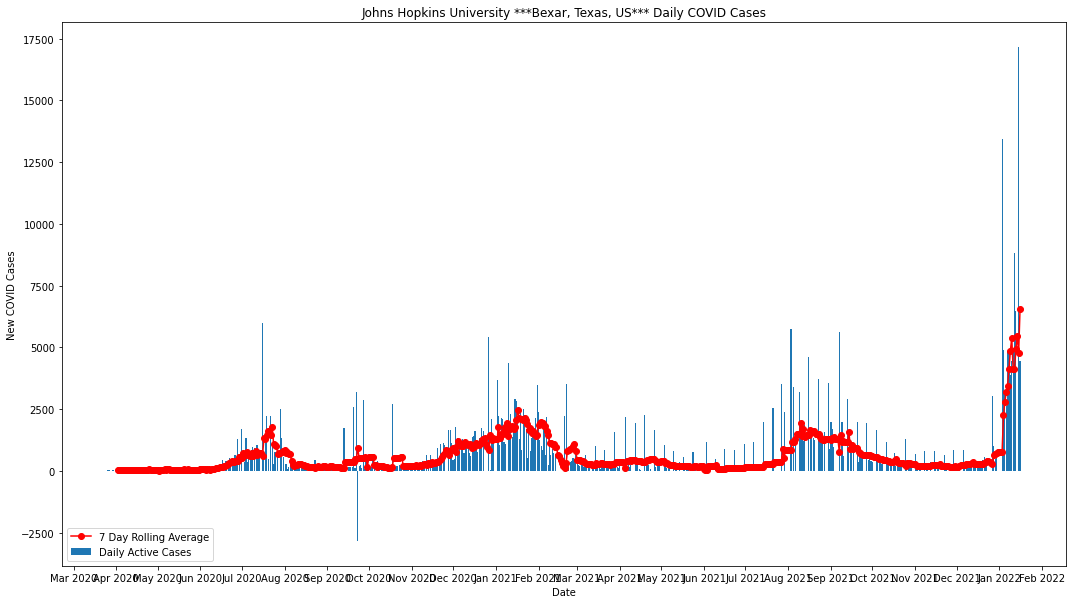

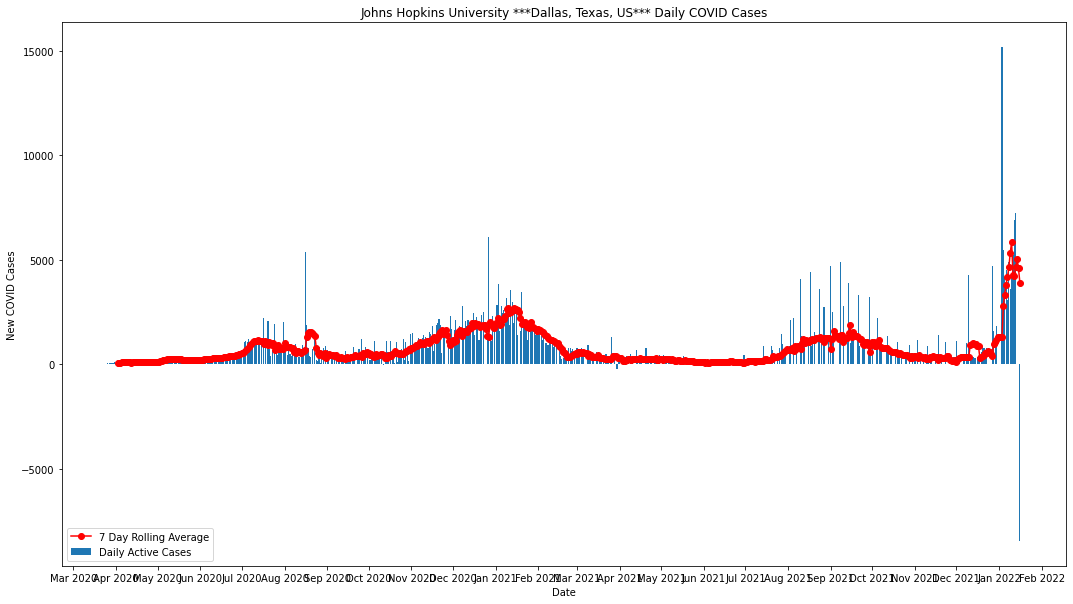

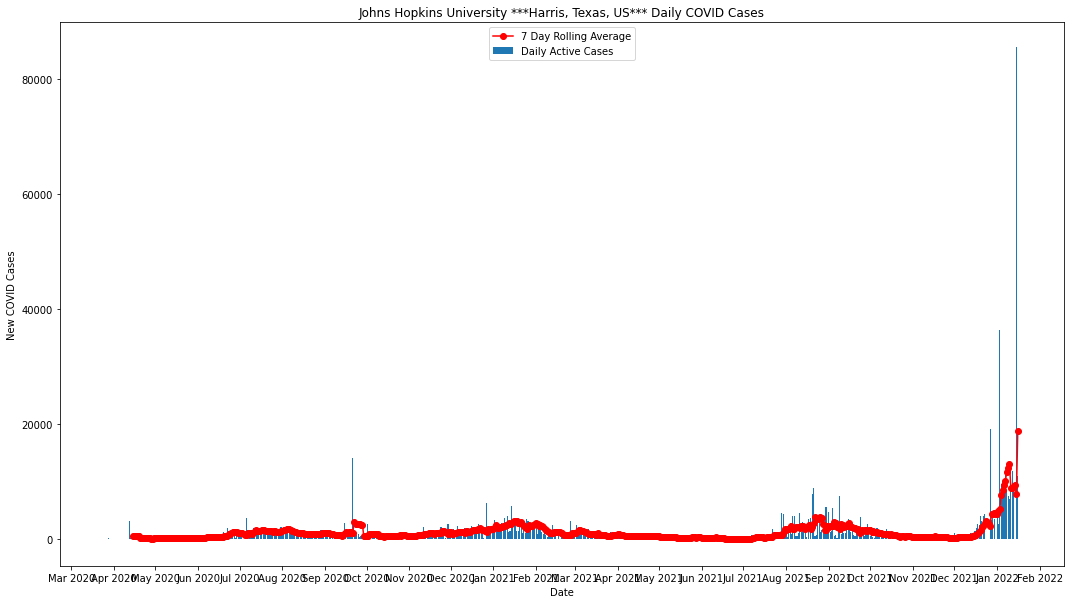

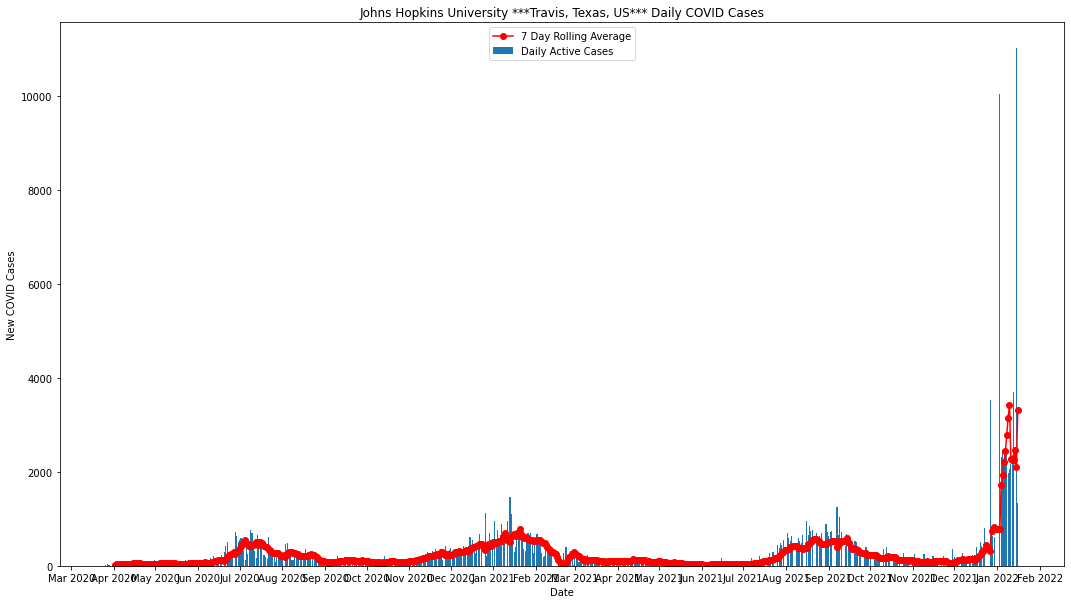

In [14]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' New York, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [15]:
short_dict = {}
short_keys = date_list[-400:] 
for x in short_keys:
    short_dict[x] = df_jhu_total_dict[x]

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' New York, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

Bronx, New York, US
Bronx, New York, US
Kings, New York, US
Kings, New York, US
New York, New York, US
New York, New York, US
Queens, New York, US
Queens, New York, US
Richmond, New York, US
Richmond, New York, US


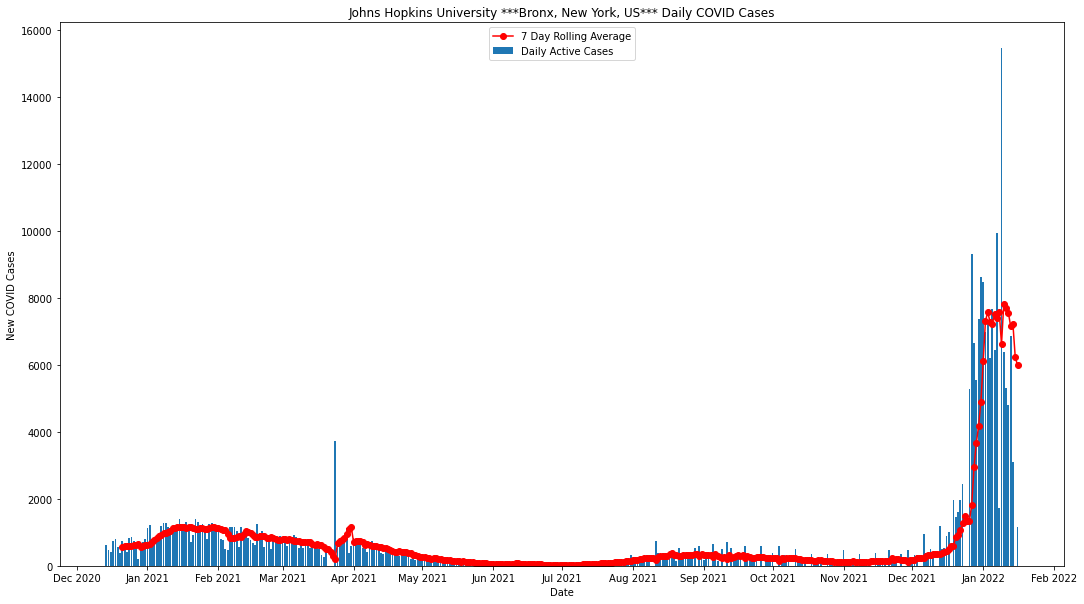

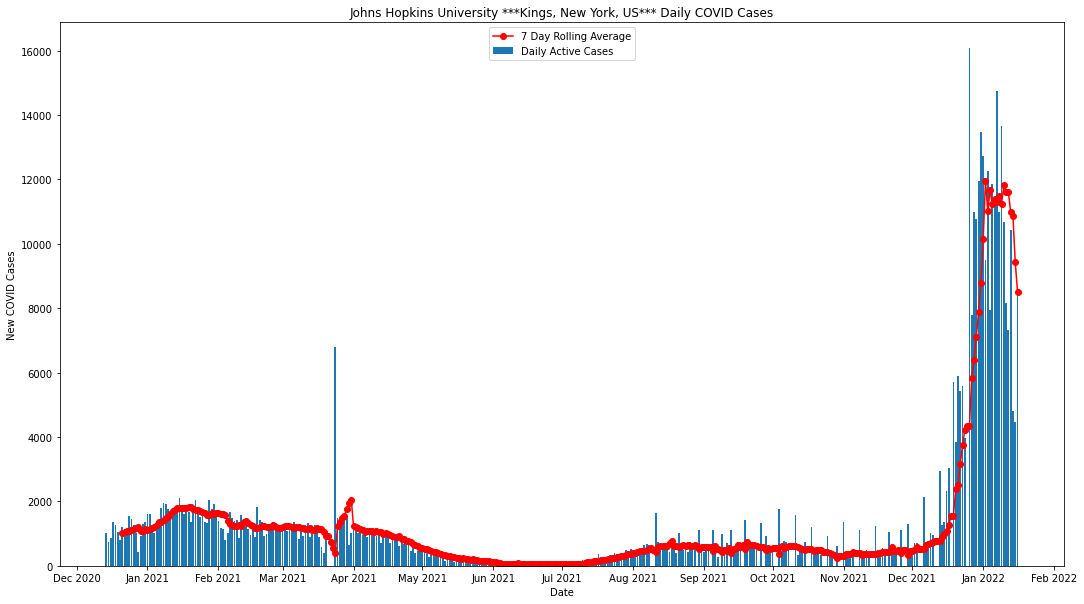

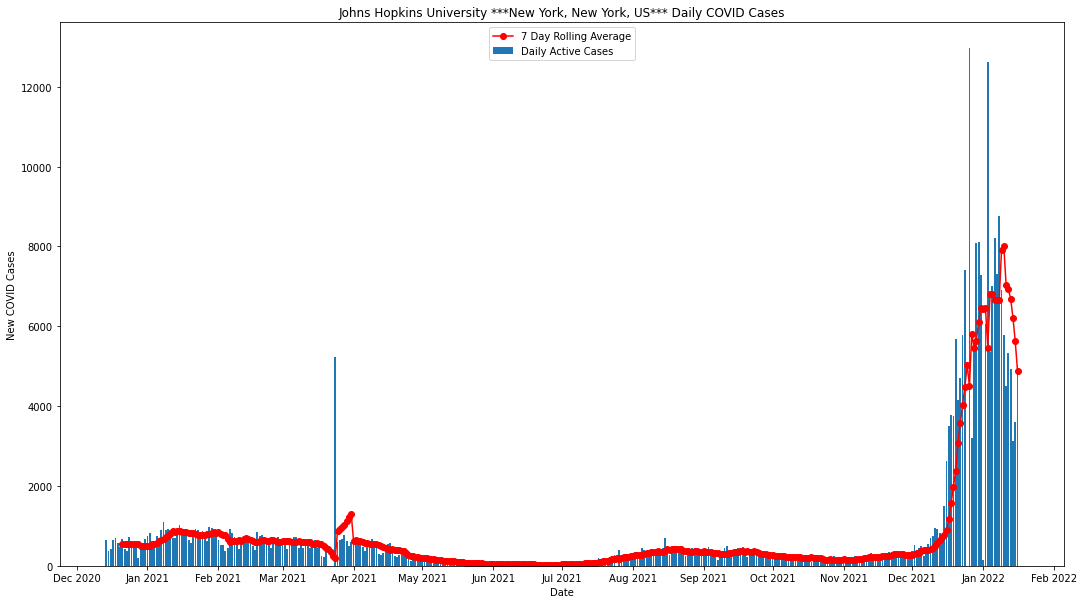

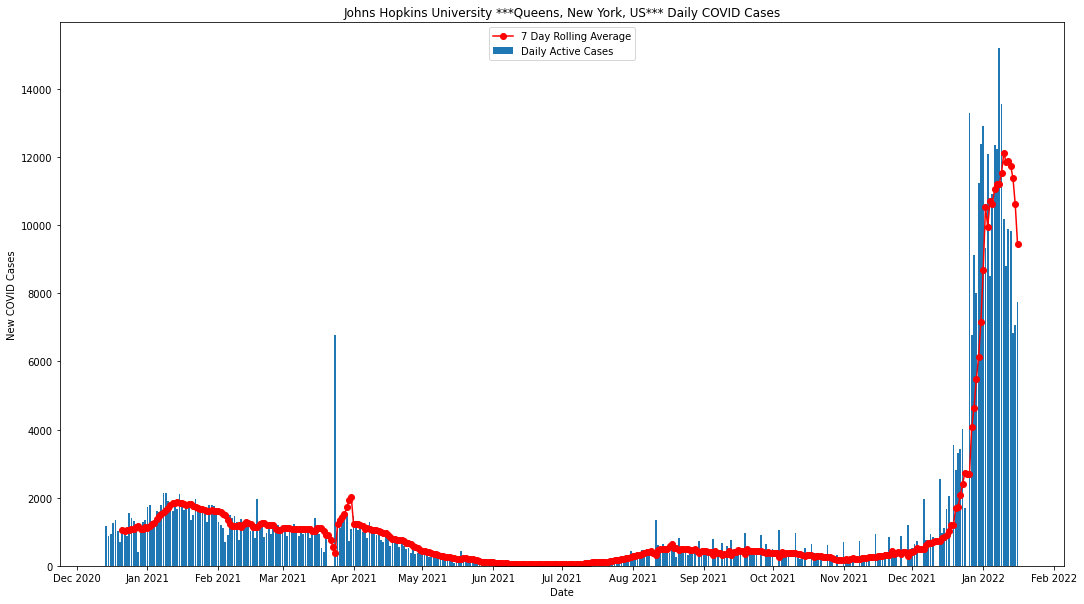

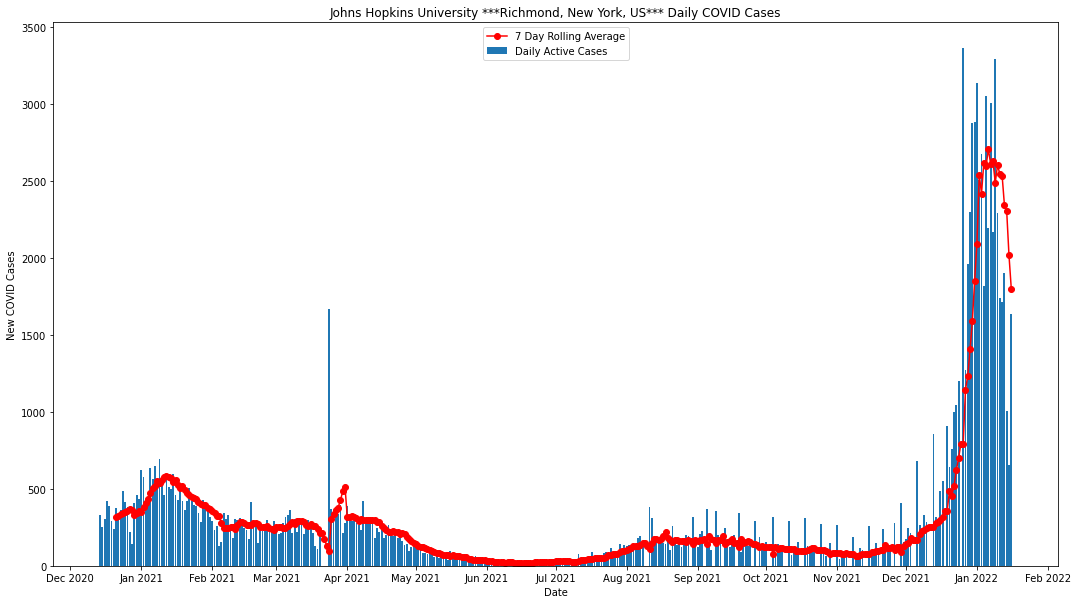

In [16]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_confirmed(short_dict, short_keys, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])
    

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Florida, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Florida, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' California, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

Bexar, Texas, US
Bexar, Texas, US
Dallas, Texas, US
Dallas, Texas, US
Harris, Texas, US
Harris, Texas, US
Travis, Texas, US
Travis, Texas, US


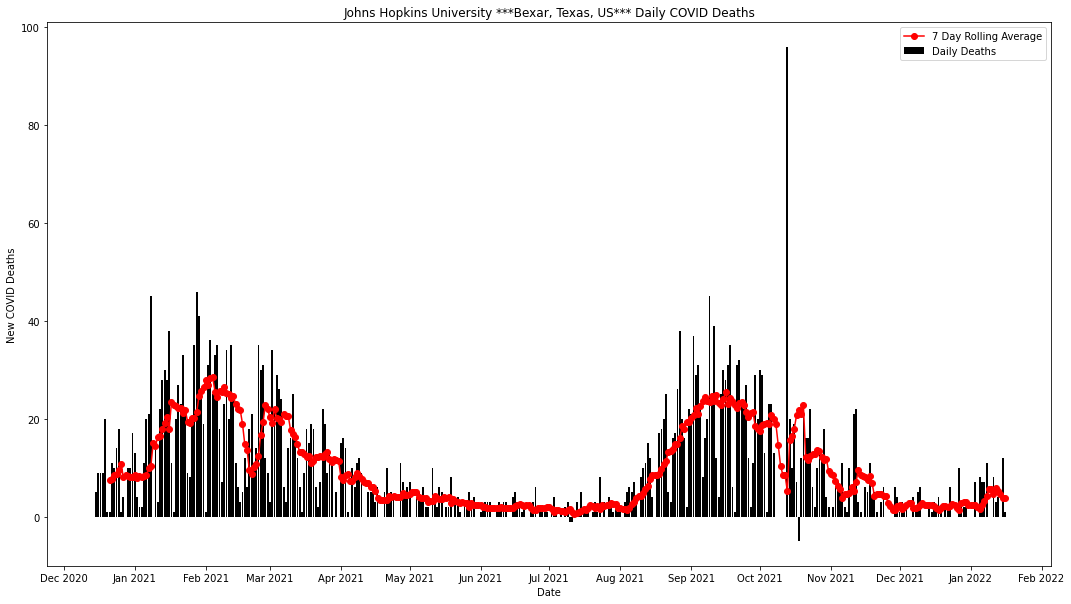

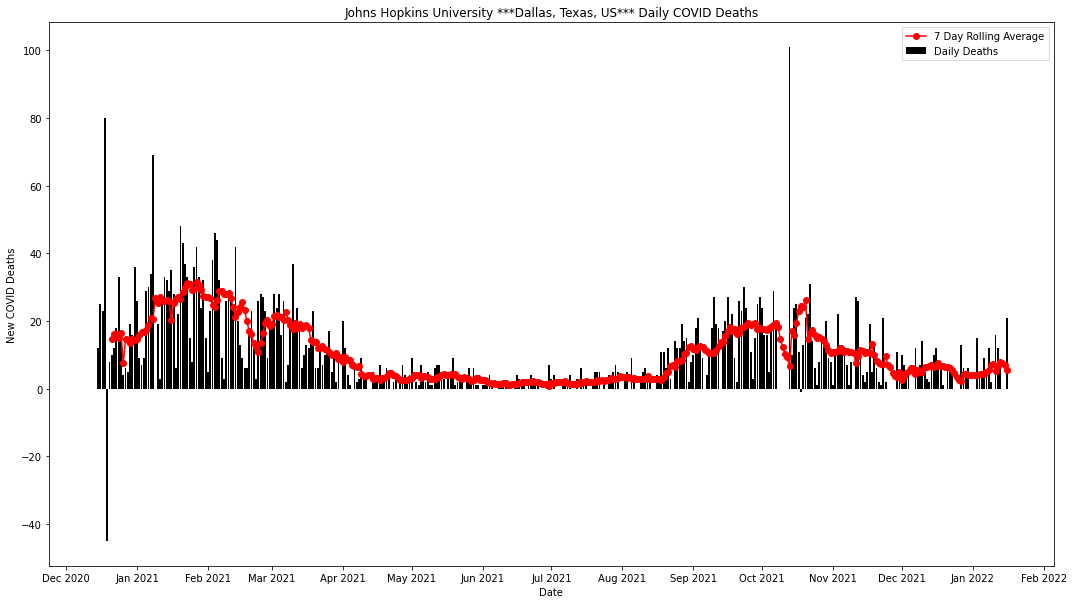

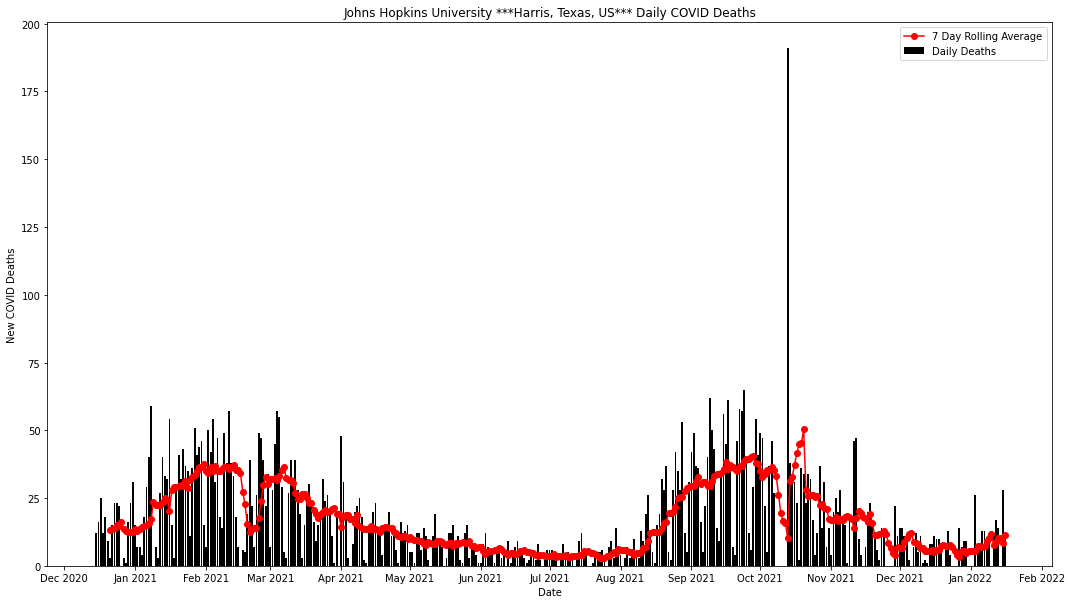

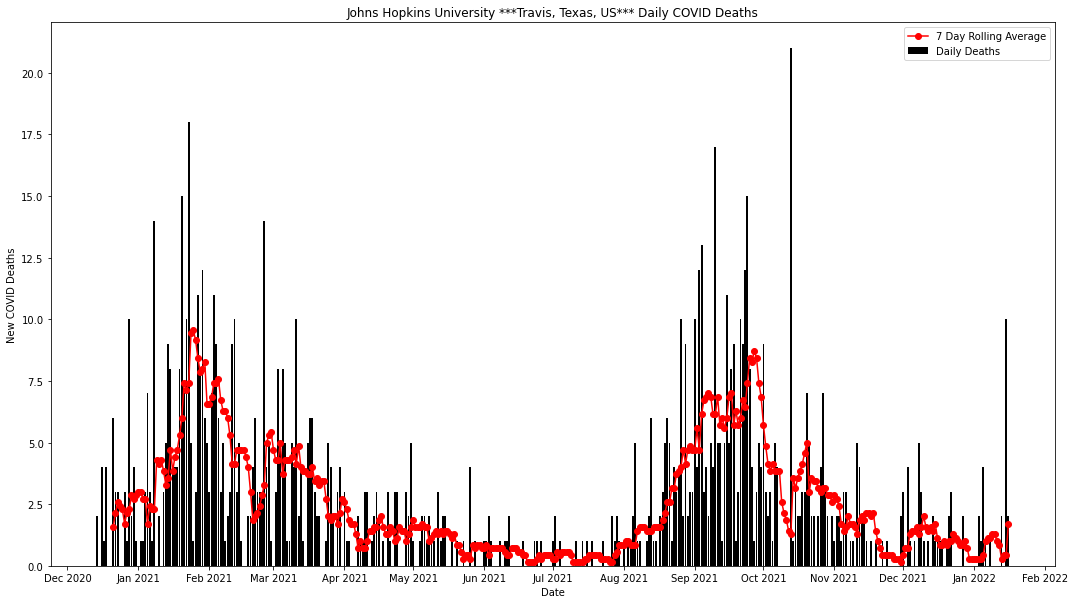

In [17]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

Bronx, New York, US
Bronx, New York, US
Kings, New York, US
Kings, New York, US
New York, New York, US
New York, New York, US
Queens, New York, US
Queens, New York, US
Richmond, New York, US
Richmond, New York, US


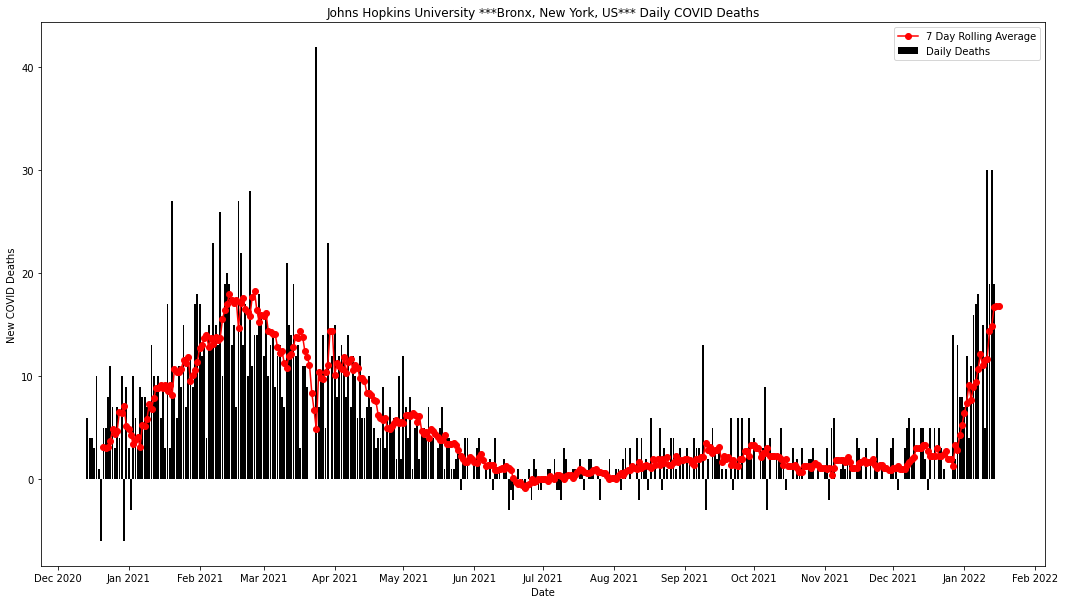

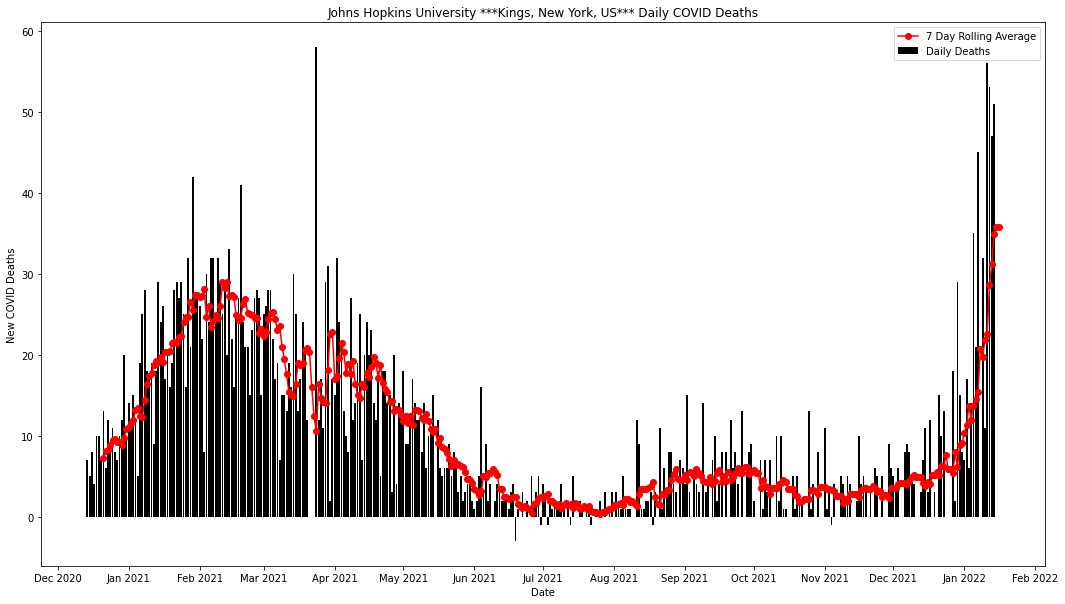

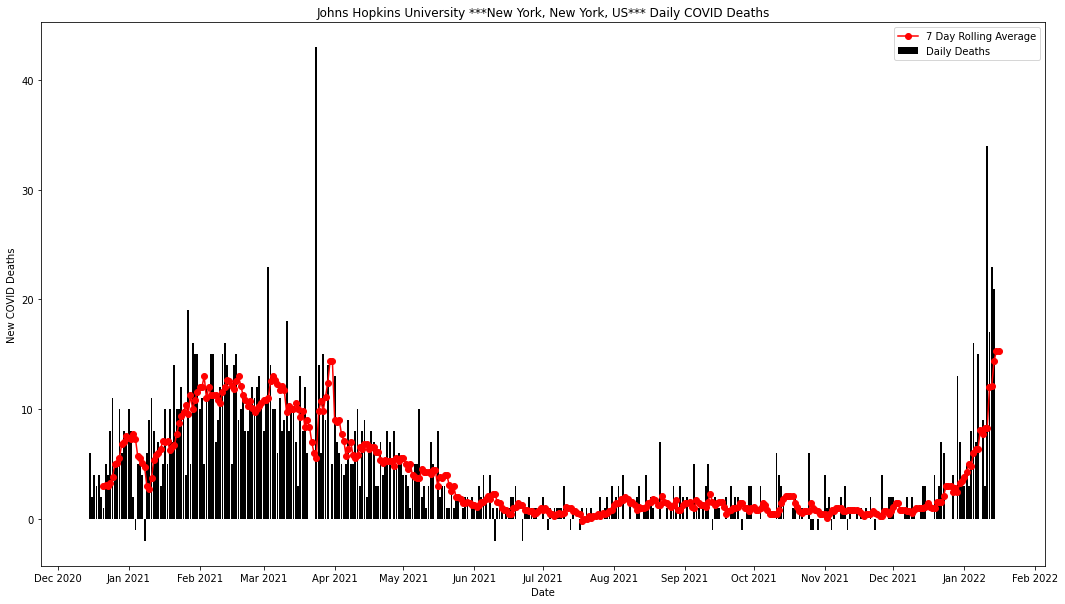

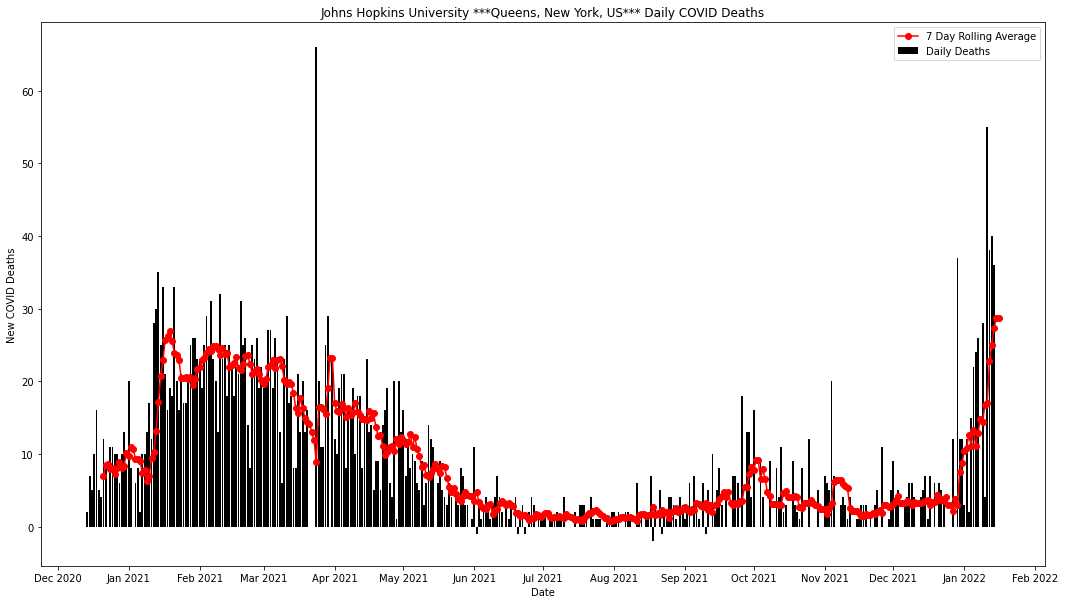

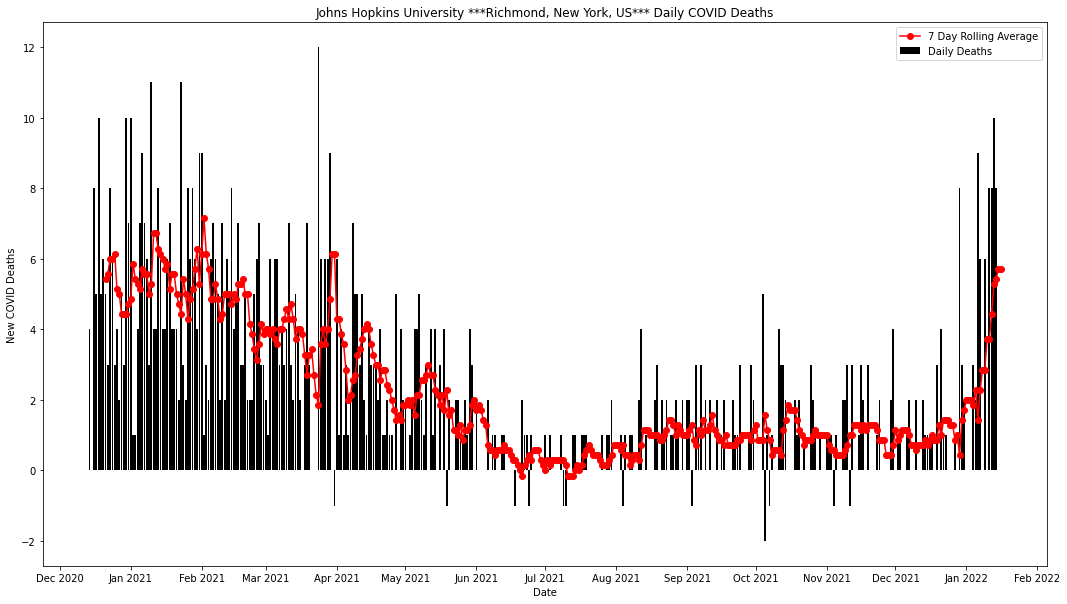

In [18]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_deaths(short_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

Bronx, New York, US
Bronx, New York, US
Kings, New York, US
Kings, New York, US
New York, New York, US
New York, New York, US
Queens, New York, US
Queens, New York, US
Richmond, New York, US
Richmond, New York, US


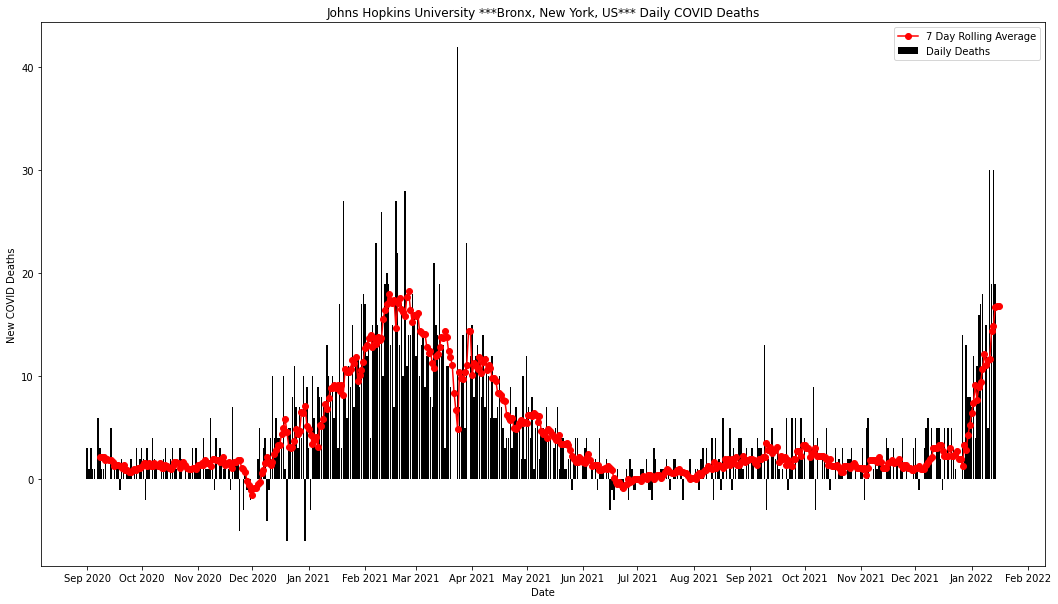

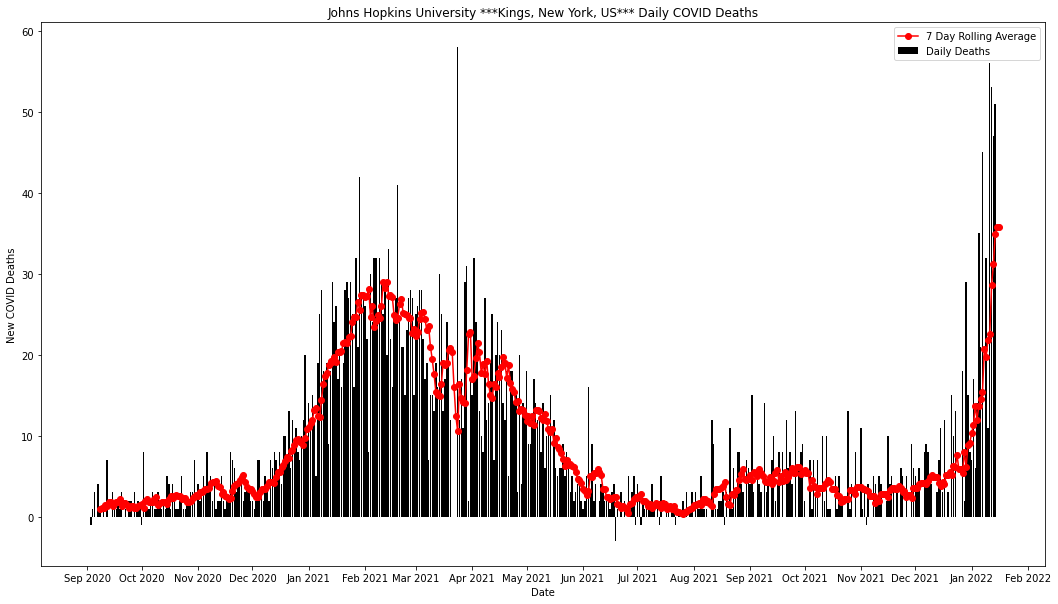

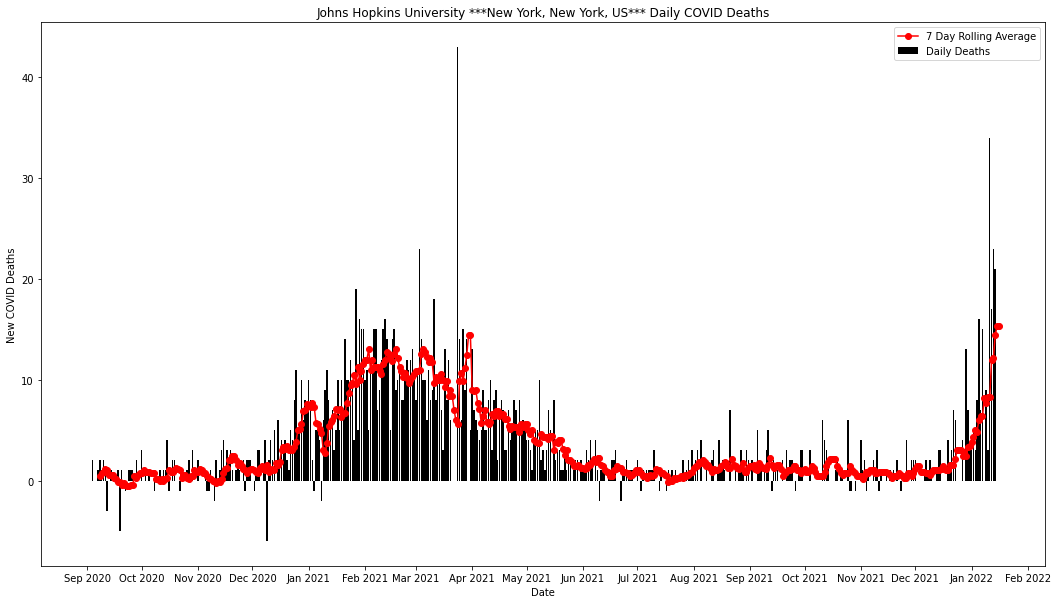

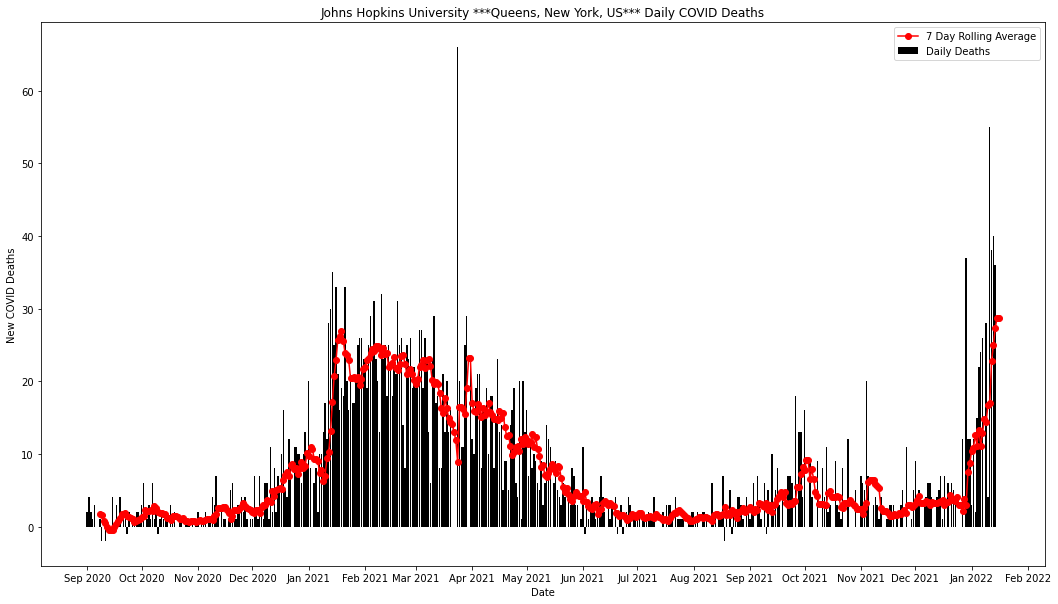

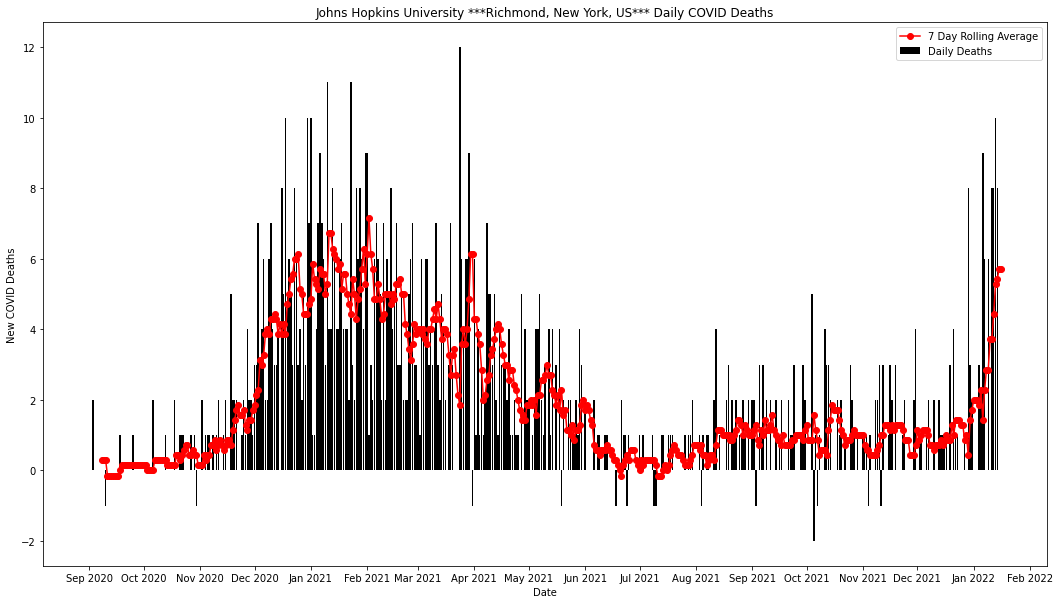

In [19]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, date_list[-650::], comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [20]:
def process_combined_key_fatality_ratio(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Case_Fatality_Ratio']]
    ccc = bbb.set_index('dt_date')
#    ddd = ccc.diff(periods = 1)
    ccc_7day_moving = ccc.rolling(7).mean().shift()
    return(ccc,passed_combined_key,ccc_7day_moving)

In [21]:
def chart_daily_fatality_ratio(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('Case Fatality Ratio',color='black')
    plt.bar(passed_df.index,passed_df.Case_Fatality_Ratio)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Case Fatality Ratio'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_case_fatality_ratio(short_dict,short_keys, comkey)
    chart_daily_case_fatality_ratio(xxx[0], xxx[1], xxx[2])

In [22]:
def process_combined_key_incident_rate(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Incident_Rate']]
    ccc = bbb.set_index('dt_date')
 #  ddd = ccc.diff(periods = 1)
    ccc_7day_moving = ccc.rolling(7).mean().shift()
    return(ccc,passed_combined_key,ccc_7day_moving)

In [23]:
def chart_daily_incident_rate(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('Incident Rate',color='black')
    plt.bar(passed_df.index,passed_df.Incident_Rate)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Incident Rate'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')

short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_fatality_ratio(short_dict, short_keys, comkey)
    chart_daily_fatality_ratio(xxx[0], xxx[1], xxx[2])

short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_incident_rate(short_dict, short_keys, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_incident_rate(df_jhu_total_dict, date_list, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_incident_rate(df_jhu_total_dict, date_list, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_fatality_ratio(df_jhu_total_dict, date_list, comkey)
    chart_daily_fatality_ratio(xxx[0], xxx[1], xxx[2])

aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'].sum()))
df_total_pediatric_patients_hospitalized_confirmed_and_suspected_covid = pd.DataFrame(aaa,columns=['date', 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'])

In [24]:
aaa = []
for x in range(1,len(date_list) - 1, 1):
    #print(date_list[x + 1])
    #print(df_jhu_total_dict[date_list[x + 1 ]][df_jhu_total_dict[date_list[x + 1]]['Country_Region'] =='US'][['Confirmed']].sum() - df_jhu_total_dict[date_list[x]][df_jhu_total_dict[date_list[x]]['Country_Region'] =='US'][['Confirmed']].sum())
    aaa.append((date_list[x + 1], int(df_jhu_total_dict[date_list[x + 1 ]][df_jhu_total_dict[date_list[x + 1]]['Country_Region'] =='US'][['Confirmed']].sum() - df_jhu_total_dict[date_list[x]][df_jhu_total_dict[date_list[x]]['Country_Region'] =='US'][['Confirmed']].sum())))
df_daily_us_total = pd.DataFrame(aaa,columns = ['date', 'new_cases'])

In [25]:
df_daily_us_total.tail(1).new_cases

660    254550
Name: new_cases, dtype: int64

In [26]:
bbb = df_daily_us_total
bbb['date_dt'] = pd.to_datetime(bbb.date)
ccc = bbb
ccc = df_daily_us_total.set_index('date_dt')
ccc_rolling = ccc.rolling(7).mean().shift()

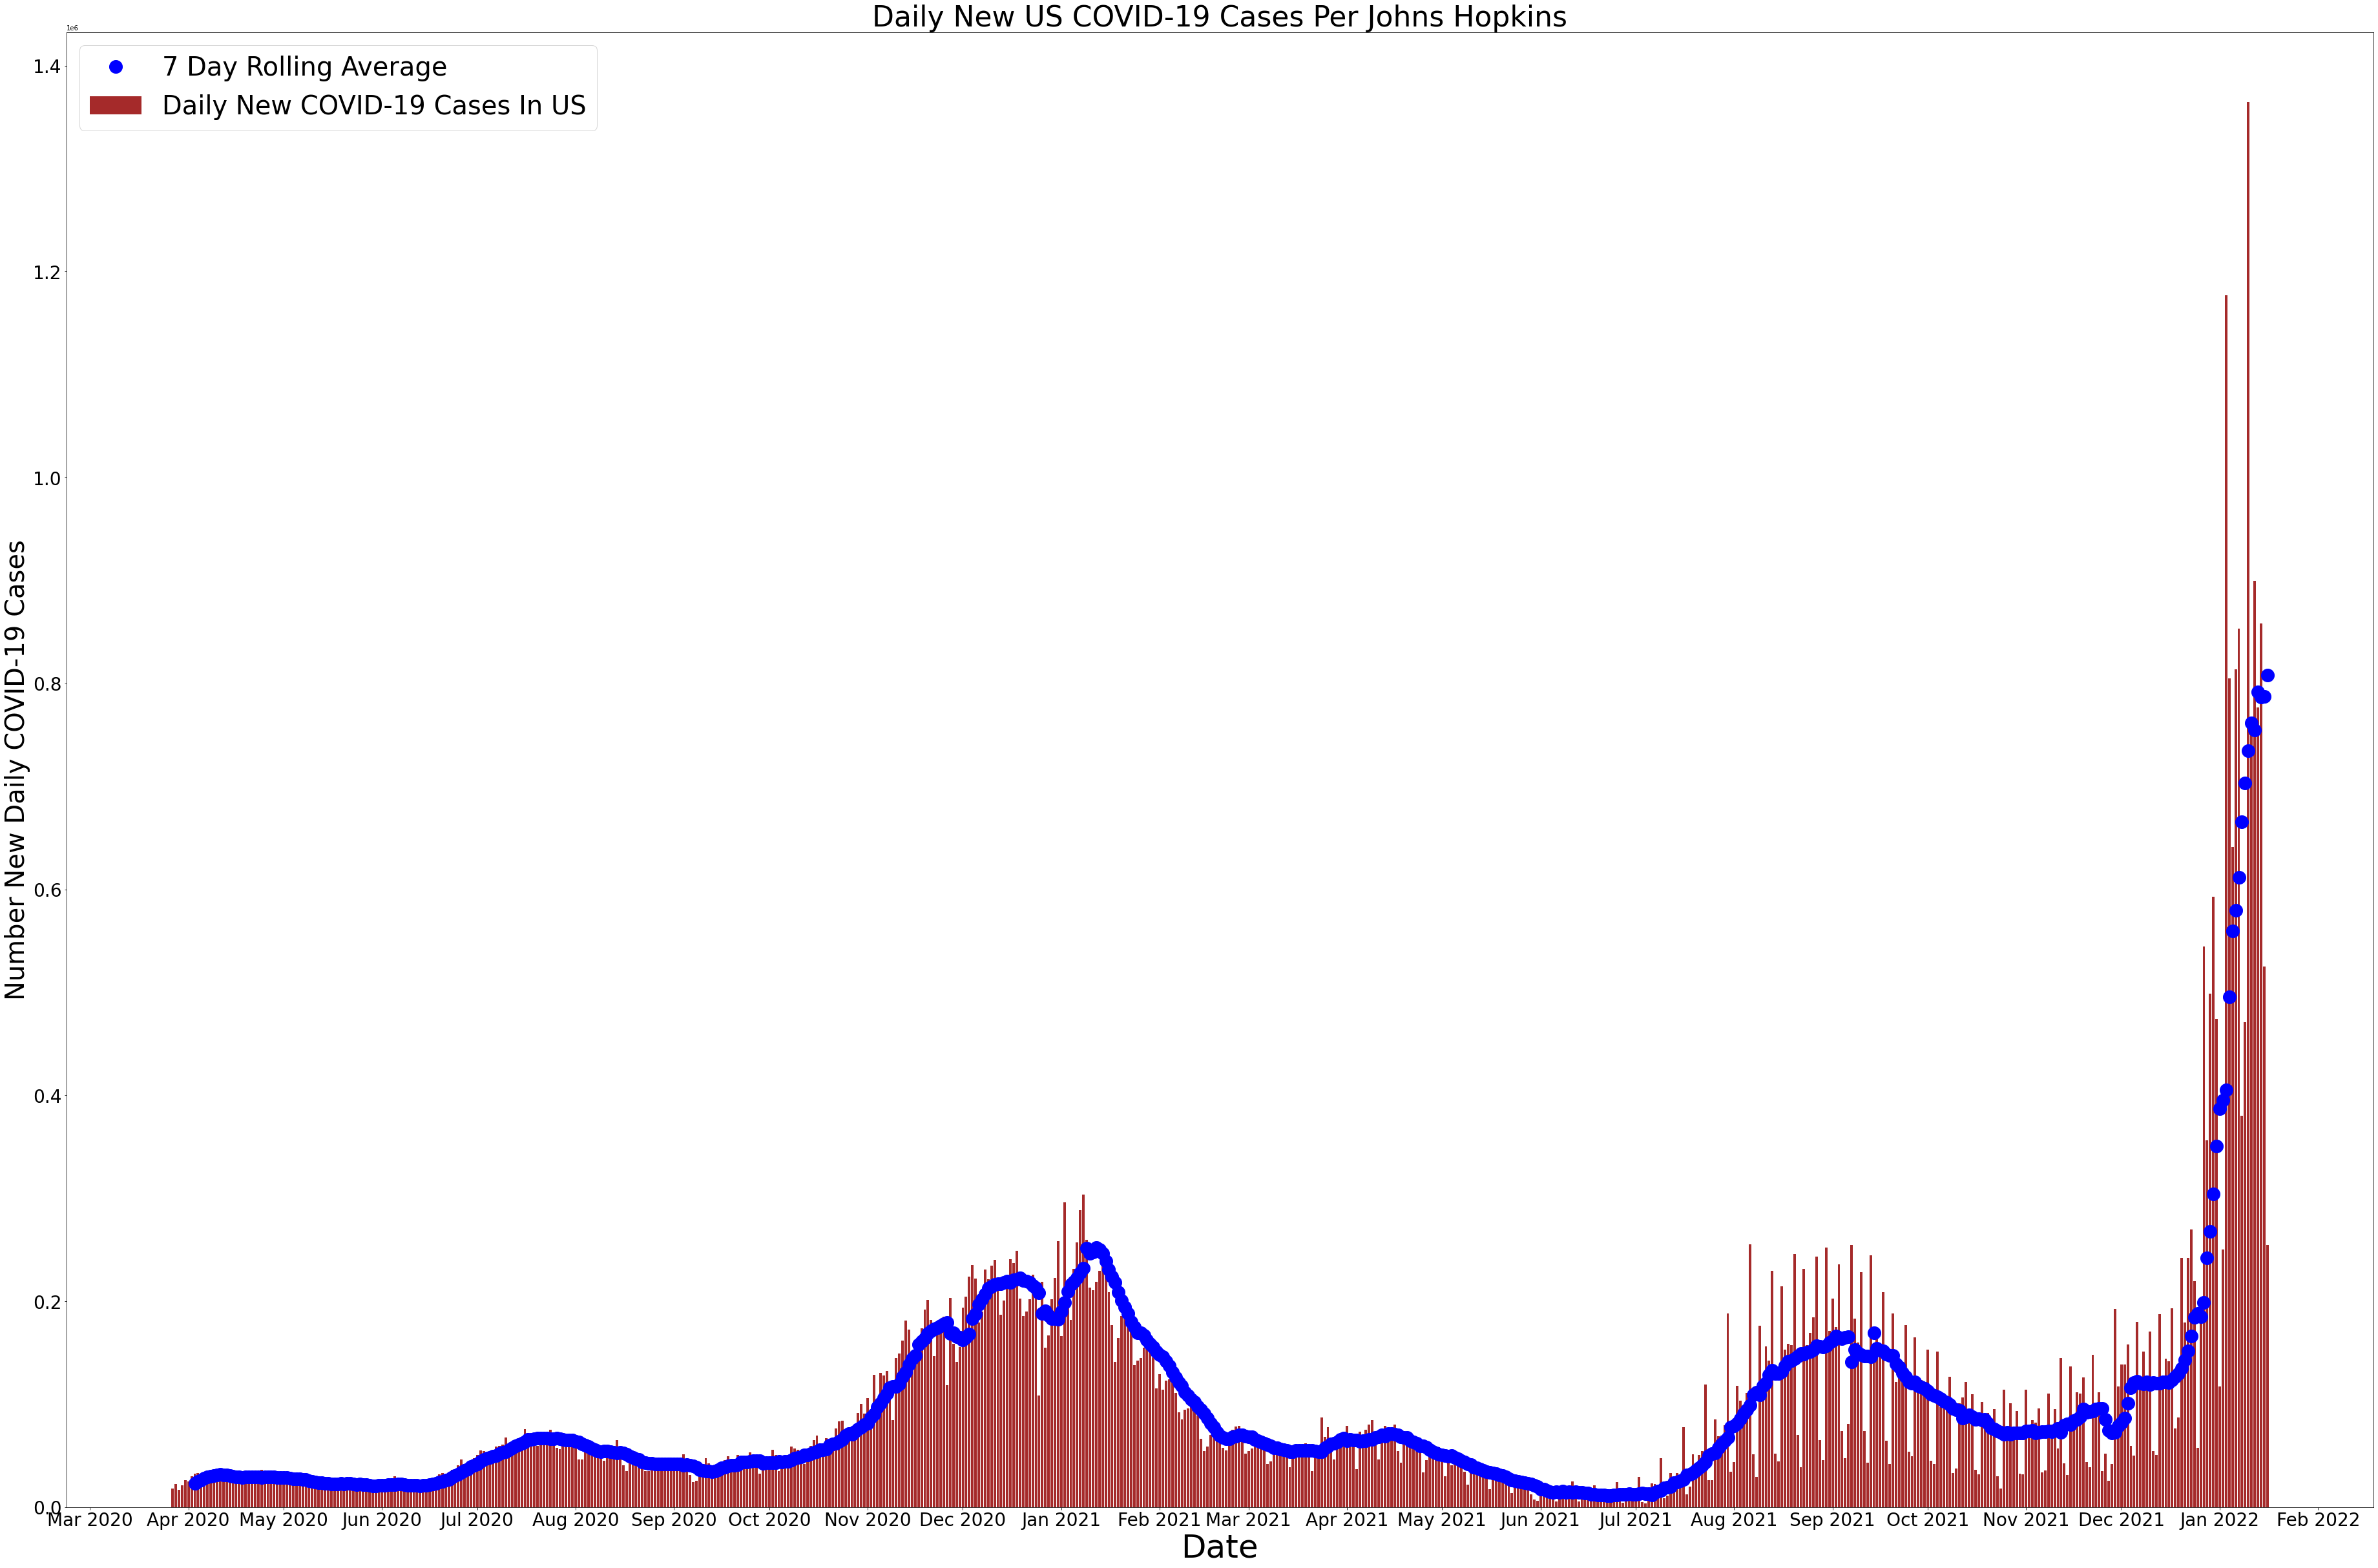

In [27]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(64,42)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily New US COVID-19 Cases Per Johns Hopkins', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 50)
plt.ylabel('Number New Daily COVID-19 Cases',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.new_cases, color = 'brown')
plt.plot(ccc_rolling.new_cases, 'bo',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily New COVID-19 Cases In US'], fontsize = 40)
fig.savefig('JHU_new_daily_cases.png')

In [28]:
ccc_rolling.tail(5)


,new_cases
date_dt,
2022-01-12,754928.142857
2022-01-13,791822.571429
2022-01-14,786468.285714
2022-01-15,787209.142857
2022-01-16,807849.285714


In [29]:
ccc.tail(10)

,date,new_cases
date_dt,,
2022-01-07,01-07-2022,853358
2022-01-08,01-08-2022,380312
2022-01-09,01-09-2022,471253
2022-01-10,01-10-2022,1364418
2022-01-11,01-11-2022,759804
2022-01-12,01-12-2022,899678
2022-01-13,01-13-2022,776455
2022-01-14,01-14-2022,858544
2022-01-15,01-15-2022,524793


In [30]:
aaa = []
for x in range(1,len(date_list) - 1, 1):
    #print(date_list[x + 1])
    #print(df_jhu_total_dict[date_list[x + 1 ]][df_jhu_total_dict[date_list[x + 1]]['Country_Region'] =='US'][['Confirmed']].sum() - df_jhu_total_dict[date_list[x]][df_jhu_total_dict[date_list[x]]['Country_Region'] =='US'][['Confirmed']].sum())
    aaa.append((date_list[x + 1], int(df_jhu_total_dict[date_list[x + 1 ]][df_jhu_total_dict[date_list[x + 1]]['Country_Region'] =='US'][['Deaths']].sum() - df_jhu_total_dict[date_list[x]][df_jhu_total_dict[date_list[x]]['Country_Region'] =='US'][['Deaths']].sum())))
df_daily_us_deaths = pd.DataFrame(aaa,columns = ['date', 'deaths'])

In [31]:
bbb = df_daily_us_deaths
bbb['date_dt'] = pd.to_datetime(bbb.date)
ccc = bbb
ccc = df_daily_us_deaths.set_index('date_dt')
ccc_rolling = ccc.rolling(7).mean().shift()

In [32]:
df_daily_us_deaths.tail()


,date,deaths,date_dt
656,01-12-2022,2447,2022-01-12
657,01-13-2022,1875,2022-01-13
658,01-14-2022,2793,2022-01-14
659,01-15-2022,804,2022-01-15
660,01-16-2022,545,2022-01-16


In [33]:
ccc_rolling.tail()

,deaths
date_dt,
2022-01-12,1609.428571
2022-01-13,1673.571429
2022-01-14,1673.428571
2022-01-15,1755.428571
2022-01-16,1775.857143


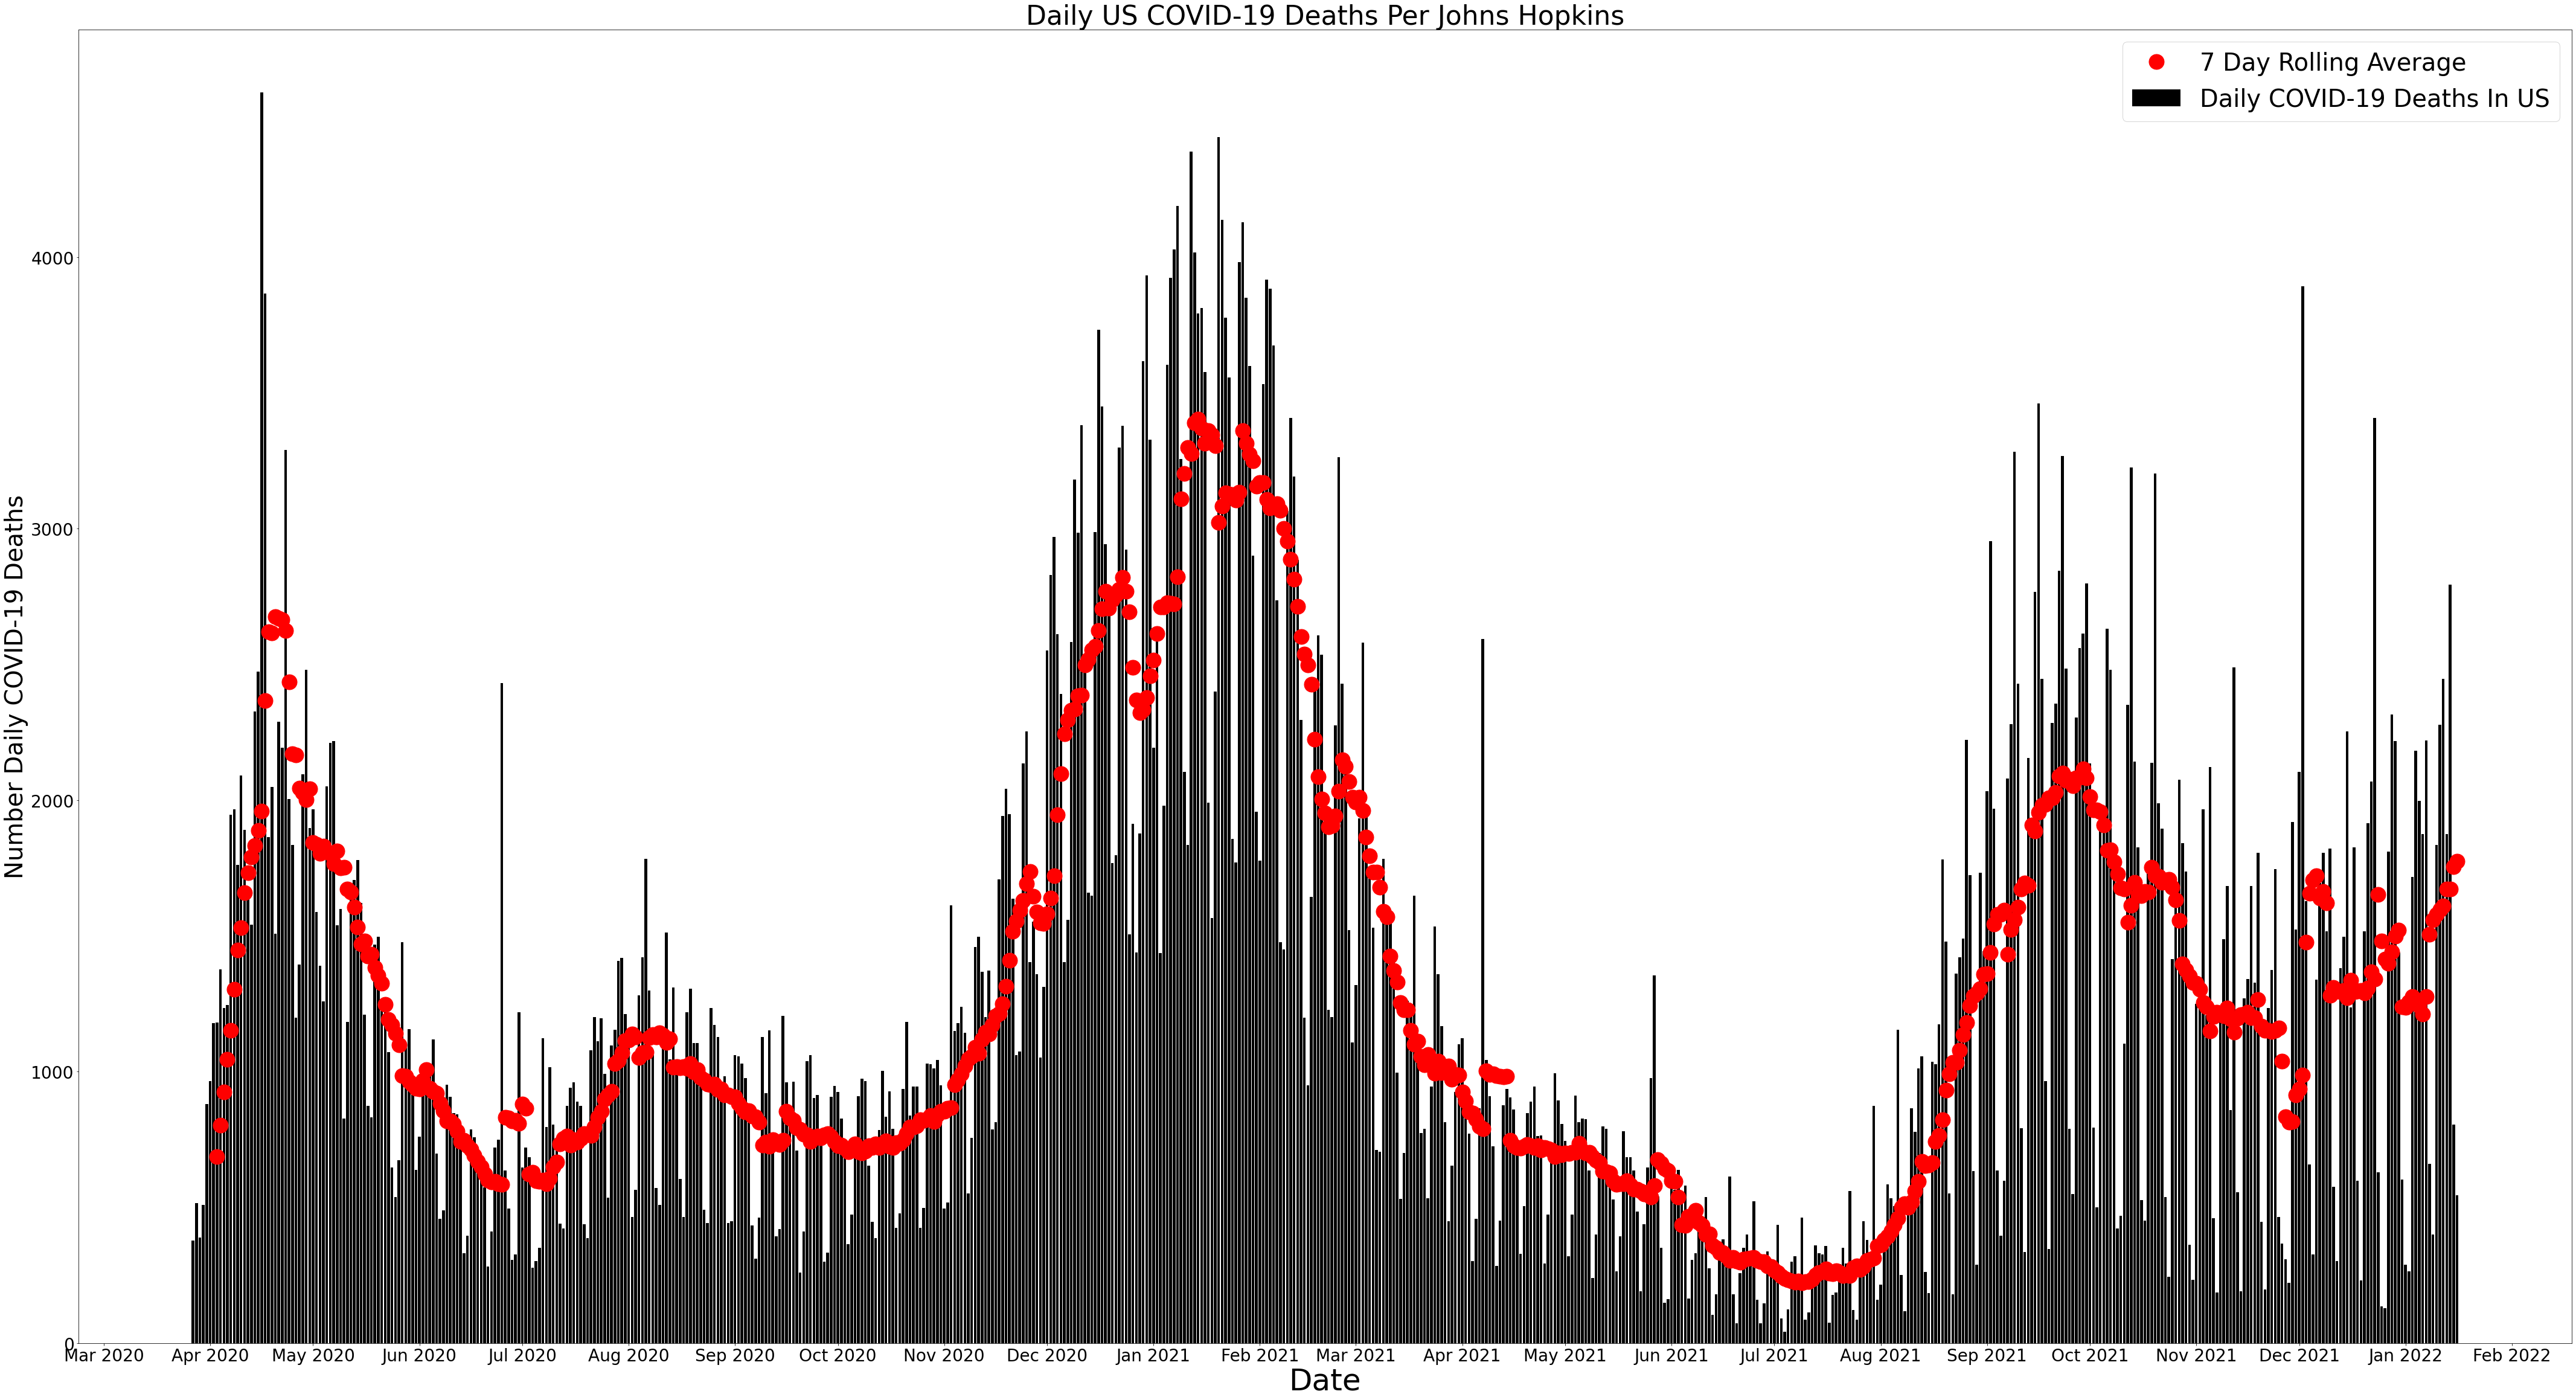

In [34]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily US COVID-19 Deaths Per Johns Hopkins', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 50)
plt.ylabel('Number Daily COVID-19 Deaths',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.deaths, color = 'black')
plt.plot(ccc_rolling, 'ro',markersize = 25)
plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('JHU_new_daily_deaths.png')

Bexar, Texas, US
Bexar, Texas, US


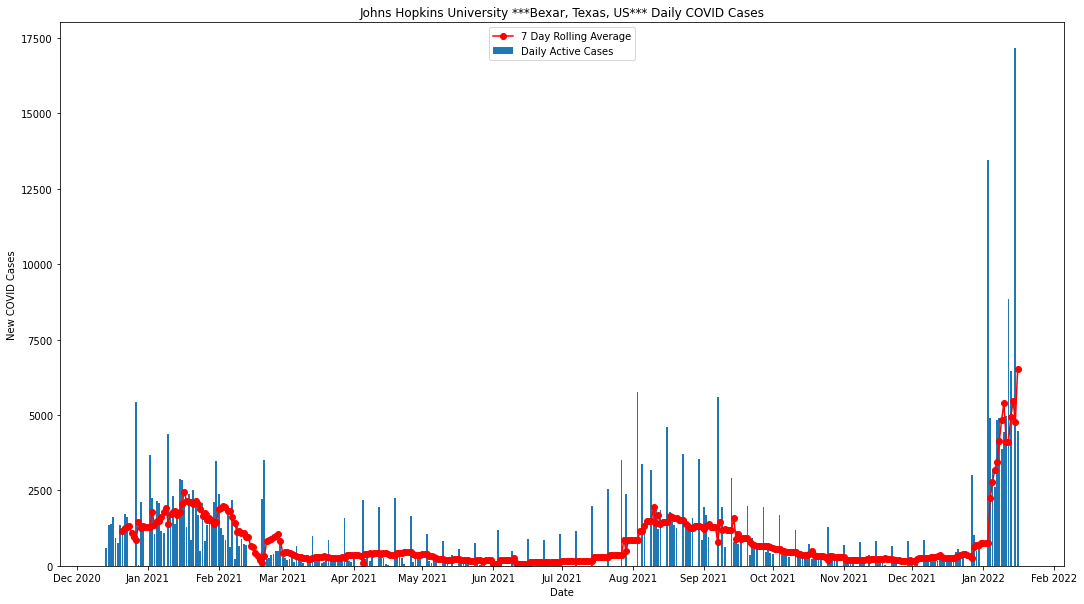

In [35]:
short_list = ['Bexar, Texas, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_confirmed(short_dict, short_keys, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])
    

Suffolk, Massachusetts, US
Suffolk, Massachusetts, US


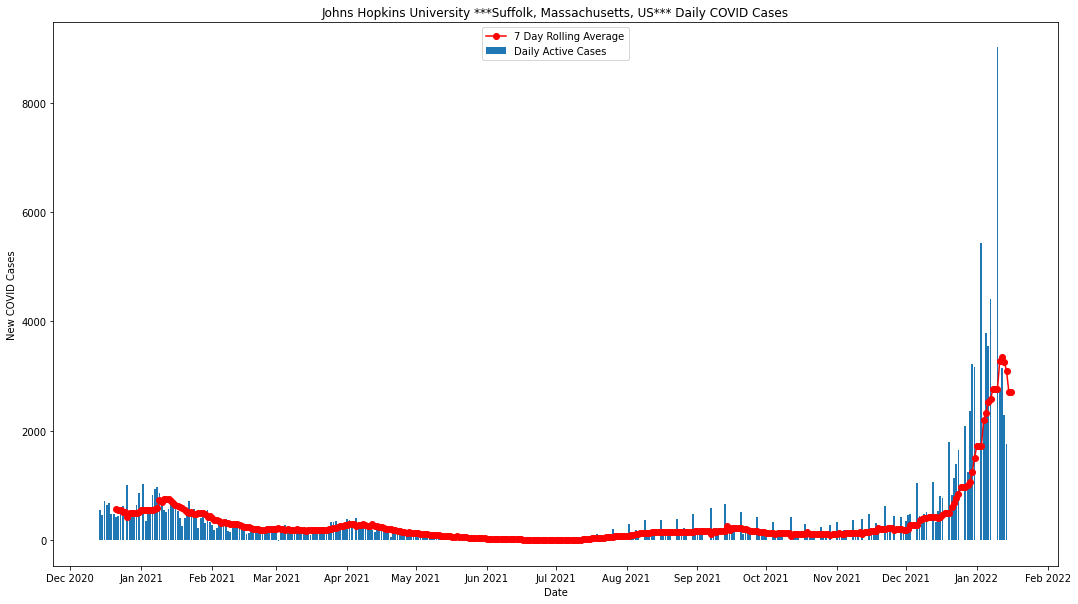

In [36]:
short_list = ['Suffolk, Massachusetts, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_confirmed(short_dict, short_keys, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])
    

Suffolk, Massachusetts, US
Suffolk, Massachusetts, US


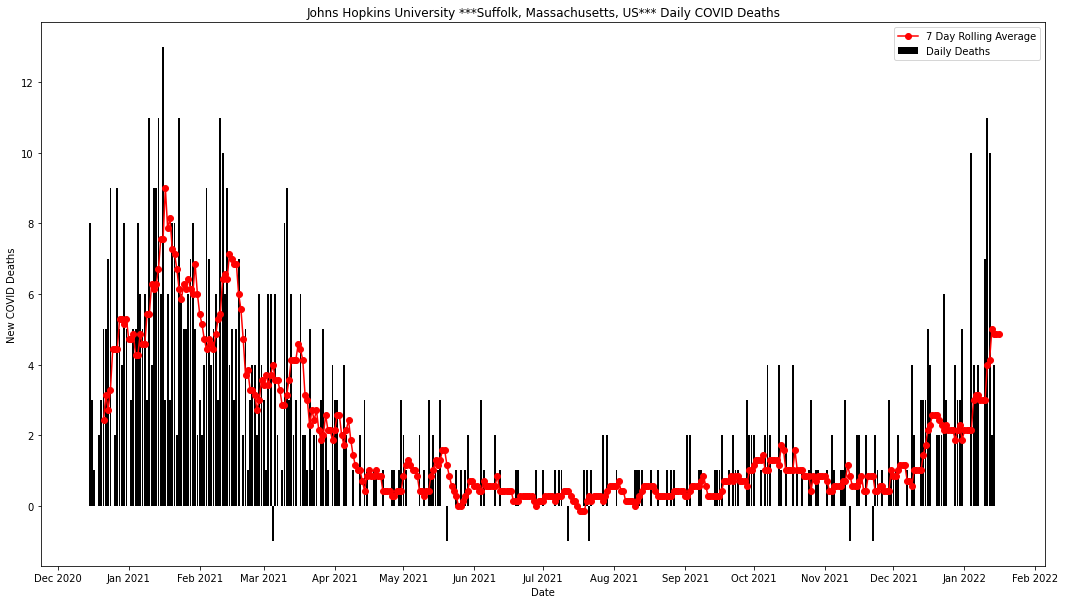

In [37]:
short_list = ['Suffolk, Massachusetts, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_deaths(short_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])